In [1]:
# import os
# import sys

# # Add the parent directory to the system path
# sys.path.append(os.path.abspath(
#     os.path.join(os.path.dirname(__file__), '../')))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

local = False
trained = True

# Data Preparation

In [2]:
df = pd.read_csv("training_data_v3.csv")

In [3]:
df.columns

Index(['listing_id', 'property_name', 'district', 'price', 'bedroom',
       'bathroom', 'dimensions', 'address', 'price_per_sqft', 'floor_level',
       'furnishing', 'facing', 'built_year', 'tenure', 'property_type', 'url',
       'facilities', 'latitude', 'longitude', 'building_name', 'nearest_mrt',
       'distance_to_mrt_in_m', 'district_id', 'nearest_hawker',
       'distance_to_hawker_in_m', 'nearest_supermarket',
       'distance_to_supermarket_in_m', 'nearest_sch', 'distance_to_sch_in_m',
       'nearest_mall', 'distance_to_mall_in_m', 'is_whole_unit', 'has_pool',
       'has_gym', 'fingerprint', 'source', 'scraped_on', 'last_updated'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31292 entries, 0 to 31291
Data columns (total 38 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   listing_id                    31292 non-null  object 
 1   property_name                 31292 non-null  object 
 2   district                      31292 non-null  object 
 3   price                         31292 non-null  int64  
 4   bedroom                       31292 non-null  int64  
 5   bathroom                      31292 non-null  int64  
 6   dimensions                    31292 non-null  int64  
 7   address                       31133 non-null  object 
 8   price_per_sqft                31133 non-null  float64
 9   floor_level                   19585 non-null  object 
 10  furnishing                    31292 non-null  object 
 11  facing                        2015 non-null   object 
 12  built_year                    31292 non-null  int64  
 13  t

In [5]:
df["furnishing"] = df["furnishing"].fillna(df["furnishing"].mode()[0])
df["furnishing"].value_counts()

furnishing
Fully          15008
Partial         9416
Unfurnished     6850
Flexible          18
Name: count, dtype: int64

In [6]:
df["facing"] = df["facing"].fillna(df["facing"].mode()[0])
df["facing"].value_counts()

facing
North          29799
South            416
North East       332
South East       271
East             189
South West       141
North West       103
West              40
North South        1
Name: count, dtype: int64

In [7]:
df["floor_level"] = df["floor_level"].fillna(df["floor_level"].mode()[0])
df["floor_level"].value_counts()

floor_level
High         21569
Mid           5120
Low           3212
Ground         782
Penthouse      486
Top            123
Name: count, dtype: int64

In [8]:
df["tenure"] = df["tenure"].fillna(df["tenure"].mode()[0])
df["tenure"].value_counts()

tenure
freehold     19727
leasehold    11565
Name: count, dtype: int64

In [9]:
df["property_type"] = df["property_type"].replace("Cluster HouseWhole Unit", "Cluster House")
df["property_type"] = df["property_type"].fillna(df['property_type'].mode()[0])
df["property_type"].value_counts()

property_type
Condo                  17923
HDB                     9028
Apartment                928
Bungalow                 646
Terraced House           581
Executive Condo          566
Semi-Detached House      562
Executive HDB            250
Cluster House            223
Corner Terrace           141
Conservation House       112
Shophouse                105
Walk-up                   88
HDB Executive             71
Townhouse                 37
Landed                    31
Name: count, dtype: int64

In [10]:
df["built_year"] = df["built_year"].replace(9999, df["built_year"].median())
df["built_year"].value_counts()

built_year
2008    2655
2023    1605
2015    1589
2016    1357
2017    1069
        ... 
2028       2
1962       2
1960       2
1954       1
2027       1
Name: count, Length: 65, dtype: int64

In [11]:
df["distance_to_mrt_in_m"] = df["distance_to_mrt_in_m"].replace(np.inf, df["distance_to_mrt_in_m"].median())

In [12]:
df["has_pool"] = df["has_pool"].replace(pd.NA, False)
df["has_gym"] = df["has_gym"].replace(pd.NA, False)

C:\Users\kaise\AppData\Local\Temp\ipykernel_11700\2702760226.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["has_pool"] = df["has_pool"].replace(pd.NA, False)
C:\Users\kaise\AppData\Local\Temp\ipykernel_11700\2702760226.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["has_gym"] = df["has_gym"].replace(pd.NA, False)


In [13]:
df.to_csv("training_data_v3_cleaned.csv", index=False)

# EDA

In [120]:
numerical_columns = ["price", "bedroom", "bathroom", "dimensions", "built_year", "distance_to_mrt_in_m", "distance_to_hawker_in_m", "distance_to_supermarket_in_m", "distance_to_sch_in_m", "distance_to_mall_in_m"]
categorical_columns = ["property_type", "furnishing", "floor_level", "district_id", "tenure", "facing"]
df[numerical_columns].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,29477.0,4613.958239,7547.119269,0.000000,1500.000000,3600.000000,5000.000000,8.500000e+05
bedroom,29477.0,1.850935,1.231003,1.000000,1.000000,1.000000,3.000000,1.000000e+01
bathroom,29477.0,1.287071,1.495422,0.000000,0.000000,1.000000,2.000000,1.000000e+01
dimensions,29477.0,1013.758150,6850.909642,1.000000,200.000000,699.000000,1151.000000,1.153513e+06
built_year,29477.0,2003.595413,14.119670,1954.000000,1995.000000,2008.000000,2015.000000,2.028000e+03
distance_to_mrt_in_m,29477.0,548.227951,420.364469,19.000000,277.406006,463.000000,691.000000,4.799697e+03
distance_to_hawker_in_m,29477.0,804.552934,613.253698,6.973000,384.449005,651.937988,1006.250977,5.274084e+03
distance_to_supermarket_in_m,29477.0,397.514390,299.666086,0.018000,205.787994,327.901001,510.177002,3.325799e+03
distance_to_sch_in_m,29477.0,674.585172,486.415053,33.164001,363.717010,564.494995,825.473999,6.078937e+03
distance_to_mall_in_m,29477.0,756.630406,565.507486,0.018000,340.213989,631.247009,1042.645996,4.834448e+03


In [121]:
df[numerical_columns].corr()["price"].sort_values(ascending=False)

price                           1.000000
bathroom                        0.527391
bedroom                         0.503821
distance_to_sch_in_m            0.246910
distance_to_mrt_in_m            0.152637
distance_to_hawker_in_m         0.151605
distance_to_mall_in_m           0.140144
dimensions                      0.117462
built_year                      0.114415
distance_to_supermarket_in_m    0.084585
Name: price, dtype: float64

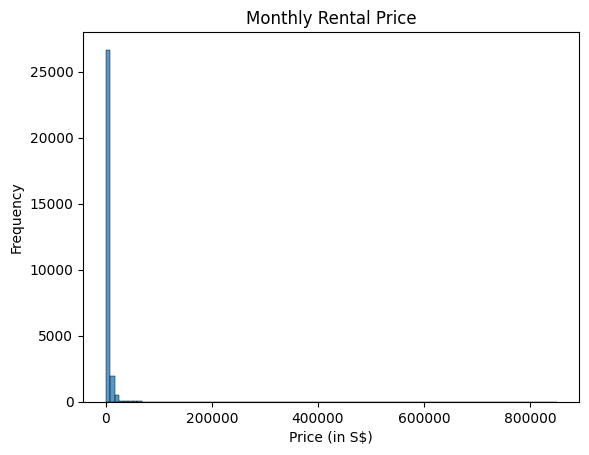

In [122]:
# Create a histogram 
sns.histplot(df["price"], bins=100)

# Add axes labels 
plt.xlabel("Price (in S$)")
plt.ylabel("Frequency")

# Add title
plt.title("Monthly Rental Price")

# Show the plot
plt.show()

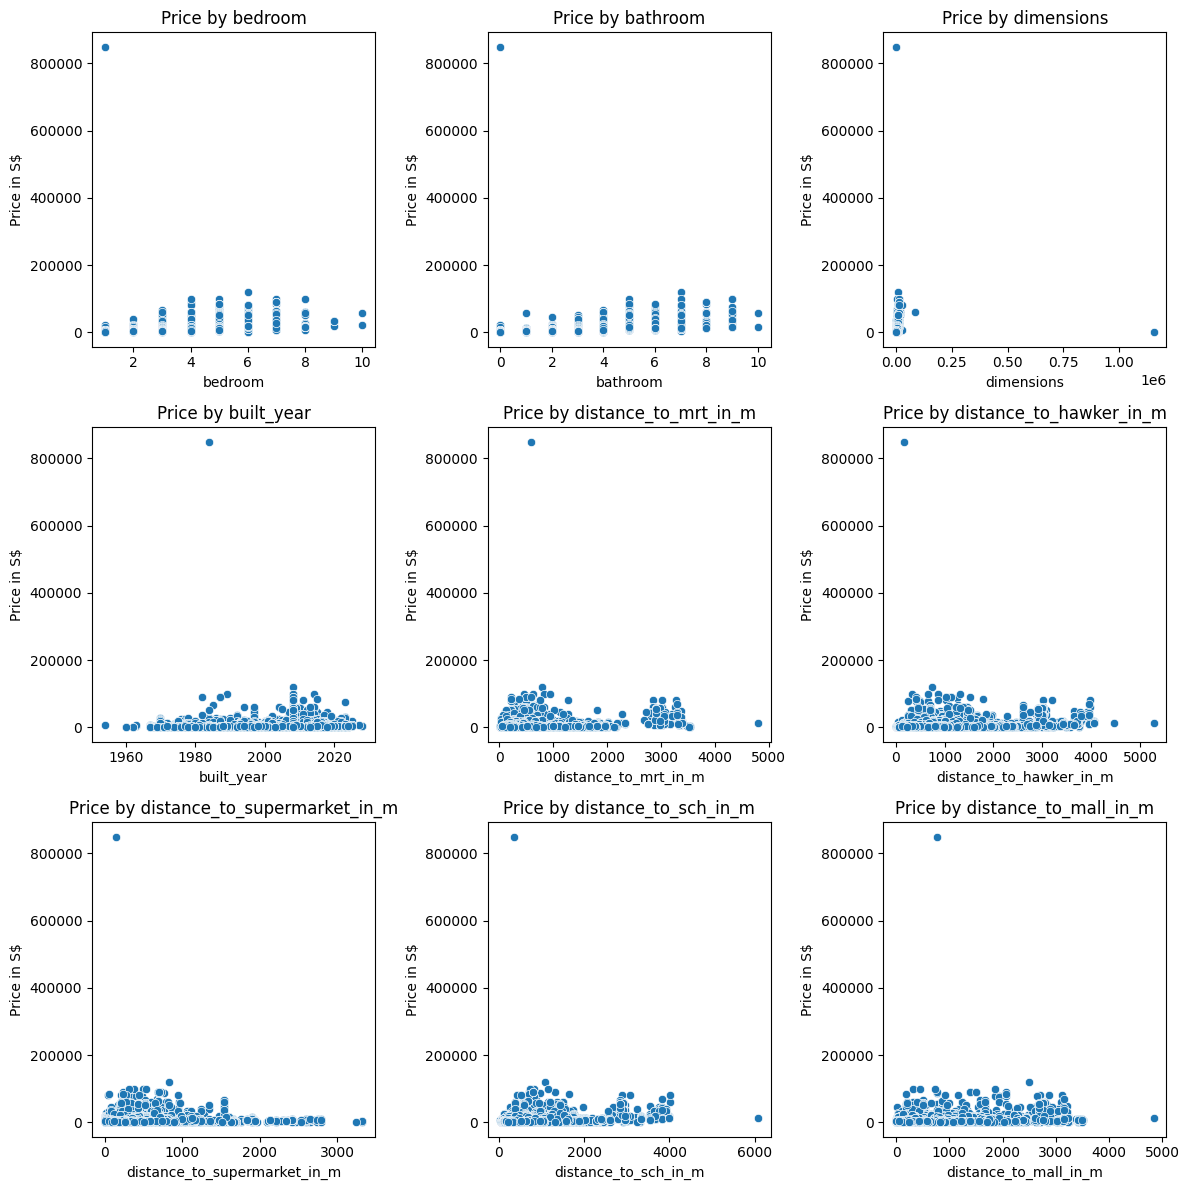

In [123]:
# Set the figure size
plt.figure(figsize=(12, 12))

# Iterate over the numerical columns
for i, col in enumerate(numerical_columns[1:]):
    # Create a subplot in a 3x3 grid, the current subplot is i+1
    plt.subplot(3, 3, i + 1)
    # Create a scatter plot between the current column and price
    sns.scatterplot(data=df, x=col, y="price")
    # Add axis labels
    plt.ylabel("Price in S$")
    plt.xlabel(f"{col}")
    # Add title
    plt.title(f"Price by {col}")

# Adjust subplot layout
plt.tight_layout()

# Show the plot
plt.show()

In [124]:
price_by_bedrooms = df["price"].groupby(df["bedroom"])
price_by_bedrooms.describe()

,count,mean,std,min,25%,50%,75%,max
bedroom,,,,,,,,
1,16939.0,2323.604404,6649.820750,300.0,1100.00,1800.0,3400.00,850000.0
2,5091.0,4676.594186,1477.852134,0.0,3800.00,4400.0,5000.00,39888.0
3,4270.0,6523.743794,3653.925763,1500.0,4600.00,5600.0,7000.00,65000.0
4,1890.0,11400.451323,7941.211679,858.0,6800.00,8900.0,13500.00,99999.0
5,870.0,15734.462069,13289.494512,4300.0,7800.00,11500.0,16999.75,100000.0
6,240.0,20215.308333,15913.363098,990.0,9875.00,15000.0,22000.00,120000.0
7,144.0,27610.256944,21048.032638,6700.0,15972.00,19000.0,30500.00,100000.0
8,28.0,26850.000000,21803.151318,7600.0,16800.00,17300.0,24250.00,100000.0
9,3.0,28666.666667,7505.553499,20000.0,26500.00,33000.0,33000.00,33000.0


In [125]:
# Descriptive statistics of price by property type
price_by_type = df["price"].groupby(df["property_type"])
price_by_type.describe()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
Apartment,928.0,4426.417026,3270.291952,850.0,2722.5,4000.0,5300.0,50000.0
Bungalow,605.0,26761.583471,19730.976790,900.0,14000.0,19000.0,38000.0,120000.0
Cluster House,217.0,9627.511521,4948.051605,1300.0,7500.0,9000.0,11900.0,45000.0
Condo,16848.0,4927.160316,4129.404080,0.0,3000.0,4200.0,5500.0,99999.0
Conservation House,105.0,6352.495238,4376.760848,1200.0,2835.0,6200.0,8000.0,25000.0
Corner Terrace,132.0,7482.810606,5195.924986,900.0,2200.0,7700.0,10125.0,26500.0
Executive Condo,535.0,3179.983178,1604.228475,600.0,1500.0,3500.0,4500.0,8600.0
Executive HDB,238.0,2938.810924,1665.781968,550.0,1000.0,3700.0,4300.0,6500.0
HDB,8466.0,2080.268958,9312.797437,300.0,900.0,1200.0,3300.0,850000.0


In [126]:
# Descriptive statistics of price by furnishing
price_by_furnishing = df["price"].groupby(df["furnishing"])
price_by_furnishing.describe()

,count,mean,std,min,25%,50%,75%,max
furnishing,,,,,,,,
Flexible,18.0,5372.222222,2210.085321,3600.0,4200.0,5000.0,5000.0,11500.0
Fully,14103.0,2889.908530,3222.076762,300.0,1200.0,2400.0,3850.0,100000.0
Partial,8870.0,6907.979256,6996.314279,350.0,3800.0,4888.0,7500.0,88888.0
Unfurnished,6486.0,5223.372032,12463.031331,0.0,1912.5,3800.0,5400.0,850000.0


# Outlier Handling

In [127]:
from sklearn.base import BaseEstimator, TransformerMixin

class OutlierHandler2Point5SD(BaseEstimator, TransformerMixin):
    def fit(self, _, y):
        # Calculate mean, standard deviation, and cutoff values of target label (y)
        self.mean = y.mean()
        self.sd = y.std()
        self.lower_cutoff = self.mean - 2.5 * self.sd
        self.upper_cutoff = self.mean + 2.5 * self.sd
        print(f"Lower cutoff: {round(self.lower_cutoff)} S$/month")
        print(f"Upper cutoff: {round(self.upper_cutoff)} S$/month")
        return self

    def transform(self, X, y):
        # Apply cutoff values
        mask = (y >= self.lower_cutoff) & (y <= self.upper_cutoff)
        # Print number of outliers
        print(f"Rental price outliers based on 3 SD: {y.shape[0] - y[mask].shape[0]}")
        # Return data with outliers removed 
        return X[mask], y[mask]

    def fit_transform(self, X, y):
        # Perform both fit and transform 
        return self.fit(X, y).transform(X, y)
    
# Create a custom transformer class to handle outliers based on 1.5 IQR
class OutlierHandlerIQR(BaseEstimator, TransformerMixin):
    def fit(self, X, y):
        # Calculate quartiles, IQR and cutoff values of target label (y) 
        Q1 = y.quantile(0.25)
        Q3 = y.quantile(0.75)
        IQR = Q3 - Q1
        self.lower_cutoff = Q1 - 1.5 * IQR
        self.upper_cutoff = Q3 + 1.5 * IQR
        print(f"Lower cutoff: {round(self.lower_cutoff)} S$/month")
        print(f"Upper cutoff: {round(self.upper_cutoff)} S$/month")
        return self

    def transform(self, X, y):
        # Apply cutoff values 
        mask = (y >= self.lower_cutoff) & (y <= self.upper_cutoff)
        # Print number of outliers
        print(f"Rental price outliers based on 1.5 IQR: {y.shape[0] - y[mask].shape[0]}")
        # Return data with outliers removed 
        return X[mask], y[mask]

    def fit_transform(self, X, y):
        # Perform both fit and transform
        return self.fit(X, y).transform(X, y)

In [128]:
train_df = df

# Model Training

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# split data into train and test
rental_price = train_df['price']
X = train_df.drop(['price'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, rental_price, test_size=0.2)

column_transformer = ColumnTransformer(
    transformers=[
        ("scaler", StandardScaler(), [col for col in numerical_columns if col != "price"]),
        ("encoder", OneHotEncoder(drop=None, sparse_output=False), categorical_columns)
    ],
    remainder="passthrough"  # Include the boolean columns without transformation
)

## Train-Validation-Test Split (80-10-10)

In [130]:
# Split the data into training and temporary sets (80% train, 20% temporary)
X_train, X_temp, y_train, y_temp = train_test_split(X, rental_price, test_size=0.2, random_state=42)

# Split the temporary data into validation and test sets (50% each)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [131]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, HistGradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from sklearn import metrics
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import pandas as pd
import tensorflow as tf


## Considered models

In [132]:
models = [
    LinearRegression(), 
    Lasso(alpha=1.0),
    Ridge(),
    DecisionTreeRegressor(),
    # MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000),
    # SVR(C = 100),
    RandomForestRegressor(),
    AdaBoostRegressor(),
    HistGradientBoostingRegressor(),
    XGBRegressor(),
    CatBoostRegressor(),
    LGBMRegressor(),
]

In [133]:
outlier_handlers = [
    None,
    OutlierHandler2Point5SD(), 
    OutlierHandlerIQR()
]

In [134]:
def get_metrics(model, y_test, y_pred):
    model_results = {}
    model_results['model'] = model
    model_results['mae'] = metrics.mean_absolute_error(y_test, y_pred).round(2)
    model_results['rmse'] = np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(2)
    model_results['accuracy'] = metrics.explained_variance_score(y_test, y_pred).round(2)
    return model_results

In [135]:
# Helper function to create residual plots
def plot_residuals(y, y_pred):
    # Calculate residuals
    residuals = [actual_value - predicted_value for actual_value, predicted_value in zip(y, y_pred)]

    # Create a 1x2 grid of subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5), dpi=150)

    # Plot 1: Predicted vs. Actual Prices
    axes[0].scatter(y, y_pred)
    axes[0].plot([min(y), max(y)], 
                 [min(y), max(y)], 
                 color="red", 
                 linestyle="--", 
                 label="Perfect Prediction")  # Add diagonal reference line
    axes[0].set_xlabel("Actual Prices")
    axes[0].set_ylabel("Predicted Prices")
    axes[0].set_title("Predicted vs. Actual Prices")
    axes[0].grid(True)
    axes[0].legend() 

    # Plot 2: Residuals vs. Actual Prices
    axes[1].scatter(y, residuals)
    axes[1].axhline(y=0, color="red", linestyle="--", label="Perfect Prediction")  # Add horizontal reference line
    axes[1].set_xlabel("Actual Prices")
    axes[1].set_ylabel("Residuals")
    axes[1].set_title("Residuals vs. Actual Prices")
    axes[1].grid(True)
    axes[1].legend() 

    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()

In [136]:
# Loop through each outlier handler
if not trained:
    for outlier_handler in outlier_handlers:
        # Loop through each model
        for model in models:
            # Print outlier handler and model
            print("=" * 100)
            print(f"Model: {model}")
            print(f"Outlier handling: {outlier_handler}")
            
            # Remove outliers
            if outlier_handler is None:
                X_train_new, y_train_new = X_train.copy(), y_train.copy()
                X_val_new, y_val_new = X_val.copy(), y_val.copy()
            else:
                X_train_new, y_train_new = outlier_handler.fit_transform(X_train, y_train)
                X_val_new, y_val_new = outlier_handler.transform(X_val, y_val)

            # Create a pipeline
            pipeline = Pipeline(steps=[
                ("column_transformer", column_transformer),
                ("model", model)
            ])

            # Fit the pipeline on the training data
            pipeline.fit(X_train_new, y_train_new)
            
            # Predict on the validation data
            y_val_pred = pipeline.predict(X_val_new)
            
            model_metrics = get_metrics(model, y_val_new, y_val_pred)
            print(model_metrics)
            
            # Create residual plots
            plot_residuals(y_val_new, y_val_pred)

In [138]:
params = {
    'iterations': 2250, 
    'learning_rate': 0.05288423971308536, 
    'depth': 10, 
    'subsample': 0.7068924726325713, 
    'colsample_bylevel': 0.8010693389144884, 
    'min_data_in_leaf': 82
}

# Remove outliers
outlier_handler_iqr = OutlierHandlerIQR()
X_train_new, y_train_new = outlier_handler_iqr.fit_transform(X_train, y_train)

X_train_new = column_transformer.fit_transform(X_train_new)

catboost_final_model = CatBoostRegressor(**params)
catboost_final_model.fit(X_train_new, y_train_new)

Lower cutoff: -3750 S$/month
Upper cutoff: 10250 S$/month
Rental price outliers based on 1.5 IQR: 1558
0:	learn: 2033.3020249	total: 46.2ms	remaining: 1m 44s
1:	learn: 1946.6149586	total: 76.9ms	remaining: 1m 26s
2:	learn: 1865.6408143	total: 107ms	remaining: 1m 19s
3:	learn: 1790.5273706	total: 140ms	remaining: 1m 18s
4:	learn: 1719.9243515	total: 169ms	remaining: 1m 16s
5:	learn: 1654.2634190	total: 197ms	remaining: 1m 13s
6:	learn: 1590.2307347	total: 226ms	remaining: 1m 12s
7:	learn: 1530.5862519	total: 255ms	remaining: 1m 11s
8:	learn: 1473.0202565	total: 282ms	remaining: 1m 10s
9:	learn: 1420.5301458	total: 308ms	remaining: 1m 9s
10:	learn: 1370.0775985	total: 338ms	remaining: 1m 8s
11:	learn: 1323.3718507	total: 381ms	remaining: 1m 11s
12:	learn: 1280.4110738	total: 438ms	remaining: 1m 15s
13:	learn: 1238.6288821	total: 480ms	remaining: 1m 16s
14:	learn: 1200.7836199	total: 524ms	remaining: 1m 18s
15:	learn: 1165.1096253	total: 566ms	remaining: 1m 18s
16:	learn: 1131.0405071	tot

In [140]:
# Remove outliers in validation and test data
X_val_new, y_val_new = outlier_handler_iqr.transform(X_val, y_val)
X_test_new, y_test_new = outlier_handler_iqr.transform(X_test, y_test)

# Scale numerical columns and encode categorical columns in validation and test data
X_val_new = column_transformer.transform(X_val_new)
X_test_new = column_transformer.transform(X_test_new)

# Predict on the training, validation and test data
y_train_pred = catboost_final_model.predict(X_train_new)
y_val_pred = catboost_final_model.predict(X_val_new)
y_test_pred = catboost_final_model.predict(X_test_new)

# Calculate evaluation metrics on training data
rmse = np.sqrt(metrics.mean_squared_error(y_train_new, y_train_pred))
mape = metrics.mean_absolute_percentage_error(y_train_new, y_train_pred)
r2 = metrics.r2_score(y_train_new, y_train_pred)
print("=" * 40)
print("TRAINING DATA")
print(f"RMSE: {round(rmse, 2)}")
print(f"MAPE: {round(mape, 2)}")
print(f"R-squared (R²): {round(r2, 2)}")
print("=" * 40)

# Calculate evaluation metrics on validation data
rmse = np.sqrt(metrics.mean_squared_error(y_val_new, y_val_pred))
mape = metrics.mean_absolute_percentage_error(y_val_new, y_val_pred)
r2 = metrics.r2_score(y_val_new, y_val_pred)
print("VALIDATION DATA")
print(f"RMSE: {round(rmse, 2)}")
print(f"MAPE: {round(mape, 2)}")
print(f"R-squared (R²): {round(r2, 2)}")
print("=" * 40)

# Calculate evaluation metrics on test data
mae = metrics.mean_absolute_error(y_test_new, y_test_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test_new, y_test_pred))
mape = metrics.mean_absolute_percentage_error(y_test_new, y_test_pred)
r2 = metrics.r2_score(y_test_new, y_test_pred)
print("TEST DATA")
print(f"RMSE: {round(rmse, 2)}")
print(f"MAPE: {round(mape, 2)}")
print(f"R-squared (R²): {round(r2, 2)}")

Rental price outliers based on 1.5 IQR: 197
Rental price outliers based on 1.5 IQR: 184
TRAINING DATA
RMSE: 219.42
MAPE: 642933786287003.8
R-squared (R²): 0.99
VALIDATION DATA
RMSE: 461.28
MAPE: 0.13
R-squared (R²): 0.96
TEST DATA
RMSE: 470.67
MAPE: 0.13
R-squared (R²): 0.95


In [67]:
with open("../streamlit/static/column_transformer.pkl", "wb") as file:
    pickle.dump(column_transformer, file)

In [68]:
with open("../streamlit/static/catboost.pkl", "wb") as model_file:
    pickle.dump(catboost_final_model, model_file)

In [ ]:
# estimators = [
#     ('random_forest', RandomForestRegressor()),
#     ('history_gradient', XGBRegressor())
# ]
# reg = StackingRegressor(
#     estimators=estimators,
#     final_estimator=MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000)
# )
# reg.fit(X_train_1, y_train)
# y_pred = reg.predict(X_test_1)
# model_results = {}
# model_results['mae'] = metrics.mean_absolute_error(y_test, y_pred)
# model_results['mse'] = metrics.mean_squared_error(y_test, y_pred)
# model_results['accuracy'] = metrics.explained_variance_score(y_test, y_pred)
# print(model_results)

In [ ]:
exit()

# Hyperparameter tuning

In [ ]:
X_train_2 = column_transformer.fit_transform(X_train)

ValueError: Specifying the columns using strings is only supported for dataframes.

: 

In [ ]:
# Create a random forest model
rf = RandomForestRegressor(random_state=42)

# Define hyperparameter grid 
rf_param_grid = {
    "n_estimators": [200, 300, 400, 500],               
    "max_depth": [20, 30, 40, 50],              
    "max_features": [0.33, 0.5, 0.66, 1]                
}

# Create a grid search object
rf_grid_search = GridSearchCV(estimator=rf, 
                              param_grid=rf_param_grid, 
                              cv=5, 
                              n_jobs=5,
                              scoring="neg_root_mean_squared_error",
                              verbose=4)

# Fit the grid search to the training data
rf_grid_search.fit(X_train_2, y_train)

: 

In [ ]:
# Create grid search results dataframe with validation score (RMSE) and parameter values
rf_grid_search_results = pd.DataFrame({"validation_rmse": -1 * rf_grid_search.cv_results_["mean_test_score"], 
                                       "parameters": rf_grid_search.cv_results_["params"]}) 

# Extract each parameter as a separate column
rf_grid_search_results["n_estimators"] = rf_grid_search_results["parameters"].apply(lambda x: x["n_estimators"])
rf_grid_search_results["max_depth"] = rf_grid_search_results["parameters"].apply(lambda x: x["max_depth"])
rf_grid_search_results["max_features"] = rf_grid_search_results["parameters"].apply(lambda x: x["max_features"])

# Delete the parameters column
rf_grid_search_results = rf_grid_search_results.drop("parameters", axis=1)

# Show the top 10 best performing models
rf_grid_search_results.sort_values("validation_rmse")[:10]

In [ ]:
# Create XGBoost model
xgb = XGBRegressor(random_state=42)

# Define hyperparameter grid 
xgb_param_grid = {
    "n_estimators": [100, 200, 300, 400, 500],               
    "max_depth": [3, 4, 5], 
    "subsample": [0.8, 0.9, 1.0],
    "colsample_bytree": [0.8, 0.9, 1.0],  
    "learning_rate": [0.01, 0.1],
    "min_child_weight": [1, 2, 3],
    "gamma": [0, 0.1, 0.2],           
}

# Create a grid search object
xgb_grid_search = GridSearchCV(estimator=xgb,
                               param_grid=xgb_param_grid, 
                               cv=5, 
                               n_jobs=5,
                               scoring="neg_root_mean_squared_error",
                               verbose=3)

# Fit the grid search to the training data
xgb_grid_search.fit(X_train_2, y_train)

In [ ]:
# Create grid search results dataframe with validation score (RMSE) and parameter values
xgb_grid_search_results = pd.DataFrame({"validation_rmse": -1 * xgb_grid_search.cv_results_["mean_test_score"], 
                                       "parameters": xgb_grid_search.cv_results_["params"]}) 

# Extract each parameter as a separate column
xgb_grid_search_results["n_estimators"] = xgb_grid_search_results["parameters"].apply(lambda x: x["n_estimators"])
xgb_grid_search_results["max_depth"] = xgb_grid_search_results["parameters"].apply(lambda x: x["max_depth"])
xgb_grid_search_results["subsample"] = xgb_grid_search_results["parameters"].apply(lambda x: x["subsample"])
xgb_grid_search_results["colsample_bytree"] = xgb_grid_search_results["parameters"].apply(lambda x: x["colsample_bytree"])
xgb_grid_search_results["learning_rate"] = xgb_grid_search_results["parameters"].apply(lambda x: x["learning_rate"])
xgb_grid_search_results["min_child_weight"] = xgb_grid_search_results["parameters"].apply(lambda x: x["min_child_weight"])
xgb_grid_search_results["gamma"] = xgb_grid_search_results["parameters"].apply(lambda x: x["gamma"])

# Delete the parameters column
xgb_grid_search_results = xgb_grid_search_results.drop("parameters", axis=1)

# Show the top 10 best performing models
xgb_grid_search_results.sort_values("validation_rmse")[:10]

# Final model

In [ ]:
def xgboost_tuned(X_train, y_train, X_test, y_test):
    model_results = {}
    model = XGBRegressor(
        n_estimators=500,
        max_depth=5,
        subsample=1.0,
        colsample_bytree=0.9,
        learning_rate=0.1,
        min_child_weight=1,
        gamma=0.1
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_results['model'] = 'XGBoost'
    model_results['mae'] = metrics.mean_absolute_error(y_test, y_pred)
    model_results['mse'] = metrics.mean_squared_error(y_test, y_pred)
    model_results['accuracy'] = metrics.explained_variance_score(y_test, y_pred)
    return model_results

In [ ]:
X_train_3 = column_transformer.fit_transform(X_train)

# For the test dataset, you do not need to use fit again, as we are using the mean and variance from the train dataset
X_test_3 = column_transformer.transform(X_test)

In [ ]:
model_xgboost_tuned = xgboost_tuned(X_train_3, y_train, X_test_3, y_test)

In [ ]:
model_xgboost_tuned

In [ ]:
def random_forest_tuned(X_train, y_train, X_test, y_test):
    model_results = {}
    model = RandomForestRegressor(
        n_estimators=200,
        max_depth=30,
        max_features=0.5
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_results['model'] = 'Random Forest'
    model_results['mae'] = metrics.mean_absolute_error(y_test, y_pred)
    model_results['mse'] = metrics.mean_squared_error(y_test, y_pred)
    model_results['accuracy'] = metrics.explained_variance_score(y_test, y_pred)
    return model_results

In [ ]:
model_random_forest_tuned = random_forest_tuned(X_train_3, y_train, X_test_3, y_test)

In [ ]:
model_random_forest_tuned